In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# La función toma dos listas, x e y, que representan los puntos conocidos de la función a interpolar.
def divided_differences(x, y):
    # n es el número de puntos conocidos de la función, que es igual a la longitud de la lista y.
    n = len(y)
    # coef es una lista de coeficientes que se van a calcular y que corresponden al polinomio interpolador de Newton.
    coef = [0] * n
    # En la primera posición de coef se asigna el primer valor de la lista y.
    coef[0] = y[0]

    # Se utiliza un bucle for anidado para calcular los coeficientes restantes.
    # El bucle exterior itera sobre los valores j del 1 al n-1, que corresponden al grado del polinomio interpolador.
    for j in range(1, n):
        # El bucle interior itera sobre los índices de la lista y en orden descendente.
        # Para cada iteración, se calcula la diferencia dividida y se actualiza el valor de la lista y.
        for i in range(n - 1, j - 1, -1):
            y[i] = (y[i] - y[i - 1]) / (x[i] - x[i - j])
        # El coeficiente correspondiente a j se guarda en la lista coef.
        coef[j] = y[j]

    # Finalmente, se devuelve la lista coef con los coeficientes calculados.
    return coef


# La función recibe los coeficientes del polinomio interpolador, una lista x_data con los puntos conocidos de la función,
# y un valor x en el cual se desea evaluar el polinomio interpolador.
def newton_polynomial(coef, x_data, x):
    # n es el grado del polinomio interpolador, que se calcula como la longitud de la lista coef menos 1.
    n = len(coef) - 1
    # result es la variable que almacenará el resultado de la evaluación del polinomio interpolador.
    result = coef[n]

    # Se utiliza un bucle for para calcular el valor del polinomio interpolador en x.
    # El bucle itera sobre los coeficientes del polinomio interpolador en orden descendente,
    # y utiliza la fórmula de Newton para calcular el valor del polinomio en x.
    for i in range(n - 1, -1, -1):
        result = result * (x - x_data[i]) + coef[i]

    # Finalmente, se devuelve el valor del polinomio interpolador evaluado en x.
    return result

In [ ]:
# Caso 1
x_data1 = [8.1, 8.3, 8.6, 8.7]
y_data1 = [17.56492, 17.56492, 18.50515, 18.82091]
coef1 = divided_differences(x_data1, y_data1.copy())

# Polinomios interpoladores
P1_1 = lambda x: newton_polynomial(coef1[:2], x_data1[:1], x)
P2_1 = lambda x: newton_polynomial(coef1[:3], x_data1[:2], x)
P3_1 = lambda x: newton_polynomial(coef1, x_data1, x)

# Aproximaciones
f_8_4_P1 = P1_1(8.4)
f_8_4_P2 = P2_1(8.4)
f_8_4_P3 = P3_1(8.4)

# Caso 2
x_data2 = [0.6, 0.7, 0.8, 1.0]
y_data2 = [-0.17694460, 0.01375227, 0.22363362, 0.658009197]
coef2 = divided_differences(x_data2, y_data2.copy())

# Polinomios interpoladores
P1_2 = lambda x: newton_polynomial(coef2[:2], x_data2[:1], x)
P2_2 = lambda x: newton_polynomial(coef2[:3], x_data2[:2], x)
P3_2 = lambda x: newton_polynomial(coef2, x_data2, x)

# Aproximaciones 
f_0_9_P1 = P1_2(0.9)
f_0_9_P2 = P2_2(0.9)
f_0_9_P3 = P3_2(0.9)

In [ ]:
# construccion de los polinomios

# Caso 1
display(Latex("Aproximacion 1: $f(8.4)$:"))

P1_1_latex = f"P1(x) = {coef1[0]:.5f}, \\quad f(8.4) \\approx {f_8_4_P1:.5f}"
display(Math(P1_1_latex))

P2_1_latex = f"P2(x) = {coef1[0]:.5f} + ({coef1[2]:.4f})(x - {x_data1[0]:.1f})(x - {x_data1[1]:.1f}), \\quad f(8.4) \\approx {f_8_4_P2:.5f}"
display(Math(P2_1_latex))

P3_1_latex = f"P3(x) = {coef1[0]:.5f} + ({coef1[2]:.4f})(x - {x_data1[0]:.1f})(x - {x_data1[1]:.1f}) + ({coef1[3]:.5f})(x - {x_data1[0]:.1f})(x - {x_data1[1]:.1f})(x - {x_data1[2]:.1f}), \\quad f(8.4) \\approx {f_8_4_P3:.5f}"
display(Math(P3_1_latex))

# Caso 2
display(Latex("Aproximacion 2: $f(0.9)$:"))

P1_2_latex = f"P1(x) = {coef2[0]:.8f} + ({coef2[1]:.8f})(x - {x_data2[0]:.1f}), \\quad f(0.9) \\approx {f_0_9_P1:.8f}"
display(Math(P1_2_latex))

P2_2_latex = f"P2(x) = {coef2[0]:.8f} + ({coef2[1]:.8f})(x - {x_data2[0]:.1f}) + ({coef2[2]:.8f})(x - {x_data2[0]:.1f})(x - {x_data2[1]:.1f}), \\quad f(0.9) \\approx {f_0_9_P2:.8f}"
display(Math(P2_2_latex))

P3_2_latex = f"P3(x) = {coef2[0]:.8f} + ({coef2[1]:.8f})(x - {x_data2[0]:.1f}) + ({coef2[2]:.8f})(x - {x_data2[0]:.1f})(x - {x_data2[1]:.1f}) + ({coef2[3]:.8f})(x - {x_data2[0]:.1f})(x - {x_data2[1]:.1f})(x - {x_data2[2]:.1f}), \\quad f(0.9) \\approx {f_0_9_P3:.8f}"
display(Math(P3_2_latex))

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

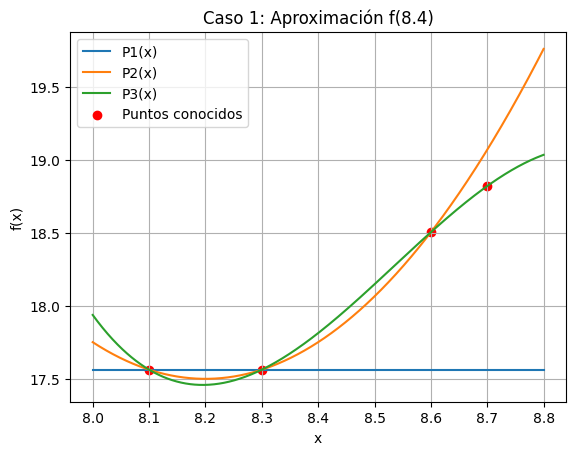

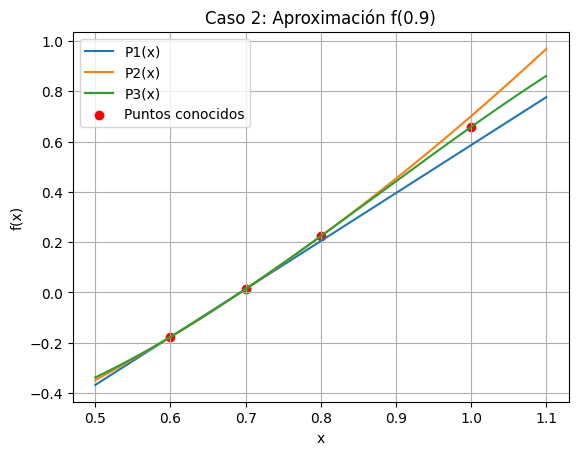

In [ ]:
# Función para graficar los polinomios interpoladores y los puntos conocidos
def plot(x_data, y_data, polynomials, x_label, y_label, title):
    x_range = np.linspace(min(x_data) - 0.1, max(x_data) + 0.1, 1000)

    for i, P in enumerate(polynomials):
        plt.plot(x_range, P(x_range), label=f"P{i + 1}(x)")

    plt.scatter(x_data, y_data, color='red', label='Puntos conocidos')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Caso 1
polynomials1 = [P1_1, P2_1, P3_1]
plot(x_data1, y_data1, polynomials1, 'x', 'f(x)', 'Caso 1: Aproximación f(8.4)')

# Caso 2
polynomials2 = [P1_2, P2_2, P3_2]
plot(x_data2, y_data2, polynomials2, 'x', 'f(x)', 'Caso 2: Aproximación f(0.9)')
